## Author: Diwei Zhu

- Text analysis project
- Classify salary level based on job descriptions with Naive Bayes classifier
- Identify top 10 effective keywords in indicating high and low salary respectively (most imfroamtive features)
- high salary: above 75% of all datapoints

In [17]:
import pandas as pd
import numpy as np
import random

import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
from nltk.corpus import stopwords
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv("C:/Users/admin/Desktop/Train_rev1.csv")

# keep only two columns useful to us
df = raw[["FullDescription","SalaryNormalized"]]
df = df.dropna()

# randomly select 2500 data points
sample = df.sample(n=2500, random_state = 1)
sample.head(5)

,FullDescription,SalaryNormalized
179687,"SAS Administrator London ****k My client, ar...",50000
18497,Job Title: Retail Director Location: Midlands ...,97500
86382,Private Client Solicitor 2 years PQE East Gr...,40000
12805,****mh**** Devon & Cornwall Excellent opportun...,22000
203497,Position: White Goods/Domestic Appliance Engin...,24000


In [3]:
sample.shape

(2500, 2)

In [4]:
# get percentiles
threshold = sample.SalaryNormalized.quantile(0.75)
print("Low salary: income below $"+str(threshold))
print("High salary: income above $"+str(threshold))

# label the dataset based on the salary threshold
# drop salary column
sample['Label'] = np.where(sample['SalaryNormalized'] >= threshold, 1, 0)
sample = sample.drop(columns = ['SalaryNormalized'])

Low salary: income below $41000.0
High salary: income above $41000.0


In [18]:
# importing and customizing stop words
stop_words = stopwords.words('english')
stop_words.extend(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',',','.','!',':',';',')','(','*','&','/','wcf','gcse','mi','rgn','qts'])

In [19]:
# Tokenization
total = []
for i in sample["FullDescription"]:
    text = word_tokenize(i)
    text1 = []
    for i in range(len(text)):
        text1.append(text[i].lower())
    total.append(text1)

In [20]:
# A long list of tokenized words for generating word frequency, lemmatized and removed stop words
wl = WordNetLemmatizer()

total_cleaned = []

for i in range(len(total)):
    text = total[i]
    text1 = [word for word in text if word not in stop_words]
    for word in text1:
        word1 = wl.lemmatize(word)
        total_cleaned.append(word1)

In [21]:
# A 2D array containing tokenized words and labels, used as the document for train and test
# lemmatized and removed stop words
doc = []

for i in range(len(total)):
    text = total[i]
    text1 = [word for word in text if word not in stop_words]
    text2 = []
    for word in text1:
        word1 = wl.lemmatize(word)
        text2.append(word1)
    if sample['Label'].iloc[i] == 0:
        doc.append([text2,'low'])
    else:
        doc.append([text2,'high'])

print("size of the array:", np.shape(doc))
print("tokenized first description:", doc[0][0])
print("salary label of the first description:", doc[0][1])

size of the array: (2500, 2)
tokenized first description: ['sa', 'administrator', 'london', 'client', 'specialist', 'life', 'pension', 'organisation', 'require', 'sa', 'administrator', 'maintain', 'administer', 'sa', 'application', 'across', 'business', 'sa', 'administrator', 'provide', 'key', 'technology', 'support', 'maintenance', 'implementation', 'wider', 'organisation', 'business', 'partner', 'sa', 'related', 'development', 'development', 'support', 'service', 'responsible', 'daytoday', 'administration', 'sa', 'platform', 'ensure', 'user', 'correct', 'access', 'right', 'clearly', 'defined', 'logical', 'security', 'model', 'constantly', 'monitor', 'model', 'ensure', 'relevance', 'business', 'maintained', 'business', 'solution', 'project', 'fundamental', 'understanding', 'sa', 'metadata', 'defined', 'accessed', 'managed', 'securely', 'maintain', 'system', 'integrity', 'performance', 'planning', 'maintenance', 'governance', 'highly', 'structured', 'thinker', 'excellent', 'planning', 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [22]:
# Identify the most common 2000 words
from collections import Counter
c = Counter(total_cleaned)
c_2000 = c.most_common(2000)

word_features = []
for i in c_2000:
    word = i[0]
    word_features.append(word)

print("top 10 common words:", word_features[0:10])

top 10 common words: ['experience', 'role', 'team', 'work', 'client', 'business', 'service', 'skill', 'working', 'within']


In [23]:
# Train classifier
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

featuresets = [(document_features(d), c) for (d,c) in doc]

# 80% training set & 20% testing set
random.shuffle(featuresets)
train_set, test_set = featuresets[:2000], featuresets[2001:]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [24]:
# Accuracy
print(nltk.classify.accuracy(classifier, test_set))

0.7775551102204409


In [25]:
# most informative features sorted
classifier.show_most_informative_features(40)

Most Informative Features
        contains(school) = True              low : high   =     14.4 : 1.0
        contains(friday) = True              low : high   =     13.2 : 1.0
      contains(offshore) = True             high : low    =     11.9 : 1.0
  contains(architecture) = True             high : low    =     10.0 : 1.0
        contains(monday) = True              low : high   =      9.7 : 1.0
     contains(architect) = True             high : low    =      9.7 : 1.0
          contains(unix) = True             high : low    =      9.7 : 1.0
         contains(enjoy) = True              low : high   =      9.5 : 1.0
    contains(governance) = True             high : low    =      8.5 : 1.0
        contains(define) = True             high : low    =      8.2 : 1.0
contains(telecommunication) = True             high : low    =      7.7 : 1.0
            contains(ui) = True             high : low    =      7.7 : 1.0
      contains(teaching) = True              low : high   =      7.7 : 

In [28]:
# generate predicted labels for testing set
# also, get the true labels
predict = []
true_values = []
for data in test_set:
    predicted = classifier.classify(data[0])
    predict.append(predicted)
    true_values.append(data[1])

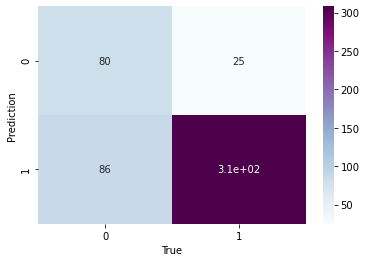

In [31]:
# confusion matrix

matrix = confusion_matrix(true_values, predict)
sns.heatmap(matrix, annot=True, cmap="BuPu")
plt.xlabel("True")
plt.ylabel("Prediction")
plt.show()